# Projets DataScientest : 
# Rapport du projet de Selection de portefeuille "online"
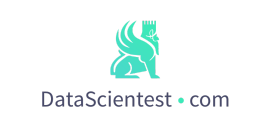

----

## Introduction


Ce document est réalisé dans le cadre d un projet pédagogique. Ce projet sera presenté pour la soutenance de fin de formation.

Il est réalisé par le duo : Nina Bekono et Bilel Hemmara.

Paul a été notre mentor. Il nous a permis d'être guidés, et de nous améliorer lors de ce projet. Nous tenons à le remercier ainsi que Daniel, et tous les membres de Datascientest qui nous ont appris et aidé lors de notre formation.


## Objet du projet

    ● Description détaillée
Le monde financier figure parmi les secteurs d’activités générant le plus de données et le plus souvent en libre accès. 

Le domaine d’allocation de portefeuille est particulièrement intéressant au sens où il est abondant en données et systématisable.

L’objectif de ce projet est de créer un modèle d’allocation de portefeuille qui adapte sa stratégie “online”, mais aussi d’adapter l’approche machine learning à un secteur d’activité présentant des points communs.

    ● Data 

Possibilité de créer ses données à l’aide des api de finance :
        ○ yahoo finance
        ○ google finance


    ● Conditions de validation du projet

        ○ Exploration des données
        ○ Dataviz’
        ○ Rapport et codes
        ○ Démo sur un cas actuel et conclusions.
        ○ Approfondissement possible avec le volet DE correspondant.
        
        
## Méthodologie 
Nos aborderons dans ce document les différentes parties de la maniére ci-dessous : 

    ● Exploration des données
    
    ● Visualisation des données 
    
    ● Modélisation des données
        ○ Modeles simplistes
        ○ Modeles robustes
        
        
## Livrables

Ce document fait partie des documents livrables que nous présenterons à Datascientest.

Les livrables complètent et enrichisent les différents sujets abordés dans ce document.

Les différents documents livrables sont :

    ● Ce rapport 
    ● Un fichier .py pour l'éxecution dynamique avec streamlit
    ● Un fichier requierement .txt pour les packages
    ● Un excel pour l'analyse de données 


## Problématique


Lorsqu’un parle de portefeuille, il s’agit de savoir comment distribuer un capital détenu entre les actifs disponibles pour réaliser un investissement avec deux contraintes fortes indissociables, le rendement et le risque. 

La problematique de sélection de portefeuille en ligne a pour but de produire une stratégie de portefeuille bn, visant à maximiser la richesse cumulée Sn. Les portefeuilles sont calculés de manière séquentielle. A chaque période t, le gestionnaire a accès à la séquence des vecteurs relatifs de prix précédents xt − 1. Ensuite, il calcule un nouveau portefeuille bt pour le prochain vecteur relatif de prix xt, où le critère de décision varie selon les différents gérants. Le portefeuille bt est noté en fonction du rendement de la période du portefeuille st. Cette procédure est répétée jusqu'à la fin, et la stratégie de portefeuille est finalement notée en fonction de la richesse cumulée du portefeuille Sn. (Cf l'article "On-Line Portfolio Selection with Moving Average Reversion" de Bin & al).



----

## Exploration des données

Nous utilisons l'API de finance de Yahoo pour constituer nos données.
Pour cela nous importons le package datareader a l'aide de la commande :

    ● pip install pandas_datareader

Les données fournis sont structurées, sans doublons et sans valeurs manquantes. 

Nous allons realiser une requete a l API pour obtenir les informations financières d'une société : 

In [1]:
#import 
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime


#init
start = '09-01-2018'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujuod hui
                              datetime.now().month , 
                              datetime.now().day))
ticket = 'air.pa'    #ticket de la societe (dans notre demonstration : air liquide )

#requete de l action d apple du start à aujourd hui
data  = pandas_datareader.data.get_data_yahoo (ticket, 
                                start = start,
                                end = end )

data   #Affichage des data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-03,107.699997,105.940002,106.040001,107.500000,595428.0,102.645134
2018-09-04,107.940002,104.099998,107.720001,105.160004,1204594.0,100.410812
2018-09-05,105.279999,103.000000,105.080002,103.000000,1386865.0,98.348358
2018-09-06,105.779999,103.239998,103.239998,104.279999,1308310.0,99.570549
2018-09-07,105.639999,103.860001,104.800003,104.839996,895199.0,100.105255
...,...,...,...,...,...,...
2020-11-18,90.500000,87.730003,90.290001,90.000000,2642183.0,90.000000
2020-11-19,89.919998,88.019997,88.500000,89.330002,2360085.0,89.330002
2020-11-20,90.000000,88.360001,89.559998,88.639999,2253690.0,88.639999


In [23]:
data.shape

(565, 6)

L'index du dataset correspond aux jours de notre fenêtre (index = jours).
Le dataset comprend 565 lignes, ce qui correspond a 565 jours.

La dataset comprend 6 colonnes qui traitent :

    ● Date : date de la cotation 
    ● High : le prix le plus haut atteint de la période
    ● Low : le prix le plus bas de la période
    ● Open : le prix de cotation au début de la période
    ● Close : le prix de cotation a la fermeture de la période
    ● Volume : Le nombre de titres échangés de la période

Pour plus de détails, un fichier EXCEL est joint pour détailler les datas.

Pour visionner l'ensemble des données, nous vous invitons à decouvrir la partie Découverte des données sur le streamlit. 



---



## Visualisation des données

Cette partie est couverte de manière dynamique sur le streamlit. 
De plus, le choix de la place boursière et de la compagnie est possible.

Sur ce rapport, nous allons également visualiser les courbes des sociétés du CAC40 afin de les étudier.


#### Observation 1
Tout d'abord, l'étude va porter sur les varibles du dataset.

Les colonnes du dataset suivantes :
    
    ● High : le prix le plus haut atteint de la periode
    ● Low : le prix le plus bas de la periode
    ● Open : le prix de cotation au début de la periode
    ● Close : le prix de cotation a la fermeture de la periode
    ● Adj Close : le prix de cotation ajusté a la fermeture de la periode
    
liées aux prix de l'action sont toutes similaires. 

La raison est que c'est le même prix à des temporalités très proches.

Nous allons le visualiser graphiquement dans la cellule suivante.

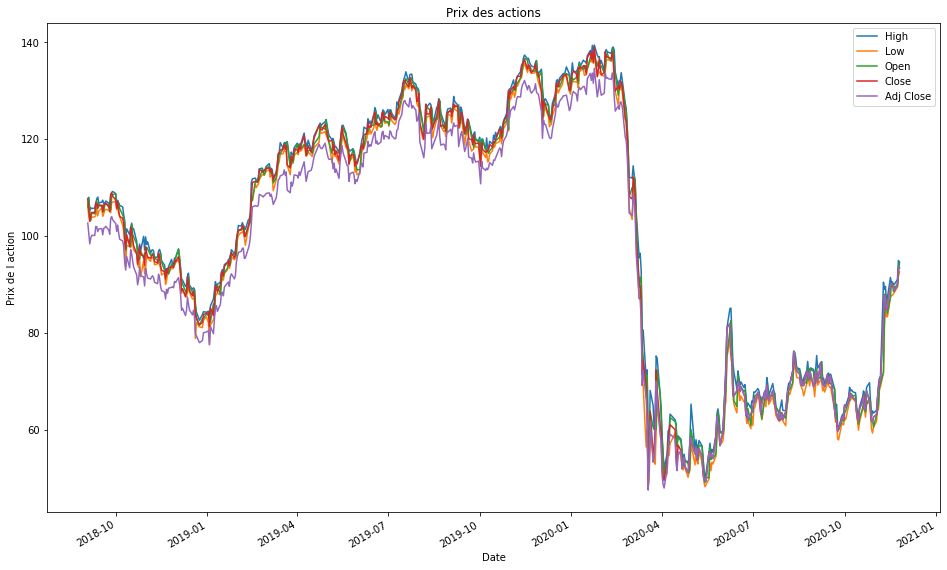

In [2]:
#import 
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt

#init
start = '09-01-2018'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujuod hui
                              datetime.now().month , 
                              datetime.now().day))
ticket = 'air.pa'    #ticket de la societe (dans notre demonstration : air liquide )

#requete de l action d airliquide du start à aujourd hui
data  = pdr.data.get_data_yahoo (ticket, 
                                start = start,
                                end = end )

#plot des prix de l action d Air liquide
data.plot (y = ['High','Low','Open','Close','Adj Close'], figsize =  (16,10))
plt.title ('Prix des actions')   
plt.ylabel ('Prix de l action')
plt.legend()
plt.show();

In [3]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.997636,0.998386,0.998404,-0.580159,0.997318
Low,0.997636,1.000000,0.998589,0.998591,-0.621767,0.997471
Open,0.998386,0.998589,1.000000,0.997203,-0.604339,0.995816
Close,0.998404,0.998591,0.997203,1.000000,-0.603241,0.999056
Volume,-0.580159,-0.621767,-0.604339,-0.603241,1.000000,-0.599649
Adj Close,0.997318,0.997471,0.995816,0.999056,-0.599649,1.000000


#### Conclusion de l'observation 1
Pour la suite du projet, nous utiliserons uniquement la variable Close (Prix de l'action à la fermeture).

#### Observation 2

Nous allons visualiser les sociétés du CAC40 par secteur afin d'apprenhender leurs tendances. 

Pour visionner l'ensemble des données, nous vous invitons à decouvrir la partie  ANALYSE COMPARATIVE DES ACTIONS POUR UN GROUPE DE SOCIETES sur le streamlit. 

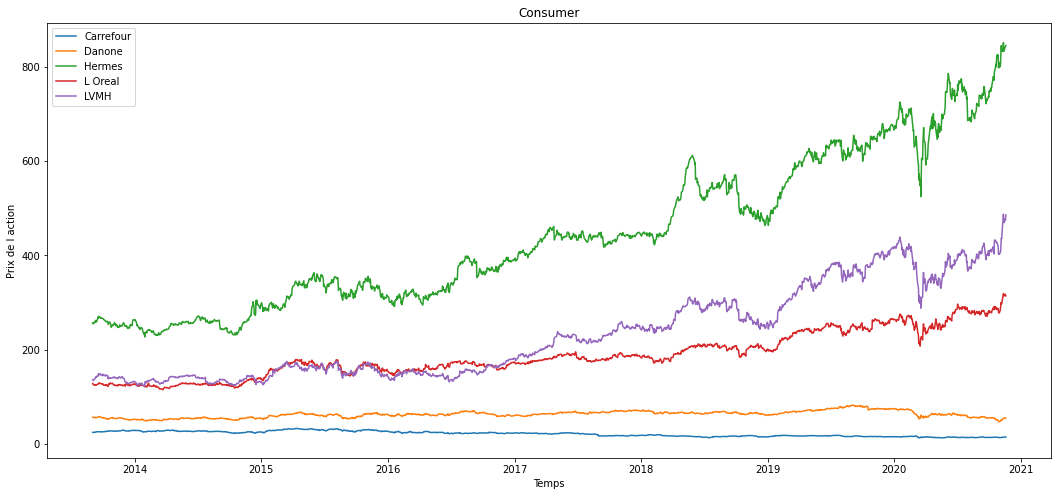

In [61]:
#Courbe des sociétés du secteur Consumer

#import 
import pandas as pd
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt



#init des variables temporelles
start = '09-01-2013'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujourd hui
                              datetime.now().month , 
                              datetime.now().day))

#listes des sociétés et des tickets
cac40_ticket = [ 'CA.PA','BN.PA','RMS.PA','OR.PA','MC.PA']
cac40_Consumer = ['Carrefour','Danone','Hermes','L Oreal','LVMH']
d = {}

plt.figure ( figsize = (18,8)  )   #taille de la figure

#get data from yahoo avec les tickets
for societe , ticket in zip(cac40_Consumer , cac40_ticket) :
    try:  
        d [societe] = dr.data.get_data_yahoo (ticket, start = start, end = end)
    except:
        continue   
    plt.plot( d [societe].index, d [societe]['Close'], label = societe)   #plot

#plot
plt.title ('Consumer')   
plt.xlabel ('Temps')    
plt.ylabel ('Prix de l action')
plt.legend()
plt.show();

##### Observations du secteur consumer

Carrefour et danone ont des courbes stables. 
LVMH, Hermes et L Oreal ont des tendances haussieres jusqu'à la crise du covid où les prix des actions connaissent une baisse avant de repartir a la hausse.

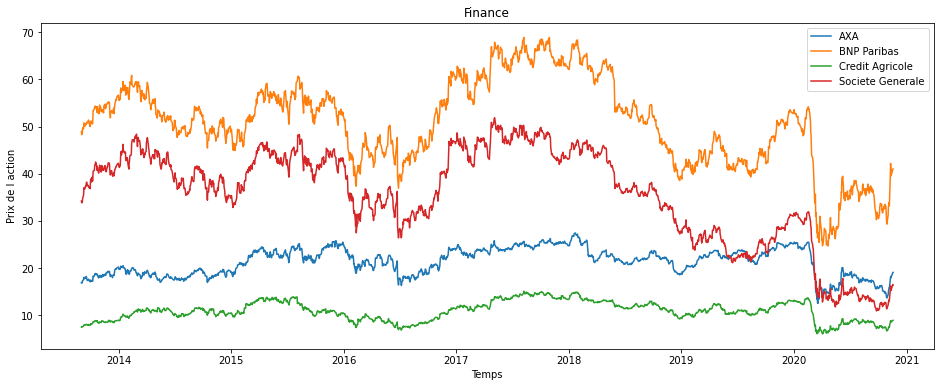

In [60]:
#Courbe des sociétés du secteur Financial

#import 
import pandas as pd
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt

#init des variables temporelles
start = '09-01-2013'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujourd hui
                              datetime.now().month , 
                              datetime.now().day))

#listes des sociétés et des tickets
cac40_ticket = [ 'CS.PA','BNP.PA','ACA.PA','GLE.PA']
cac40 = ['AXA','BNP Paribas','Credit Agricole','Societe Generale']
d = {}

plt.figure ( figsize = (16,6)  )   #taille de la figure

#get data from yahoo avec les tickets
for societe , ticket in zip(cac40 , cac40_ticket) :
    try:
        d [societe] = dr.data.get_data_yahoo (ticket, start = start, end = end)
    except:
        continue   
        
    plt.plot( d [societe].index, d [societe]['Close'], label = societe)   #plot

#plot
plt.title ('Finance')   
plt.xlabel ('Temps')    
plt.ylabel ('Prix de l action')
plt.legend()
plt.show();

##### Observations du secteur finance

Les sociétés du secteur bancaire et de l'assurance ont des actions avec des tendances stables mais subissent fortement la crise du covid 19 en 2020. 

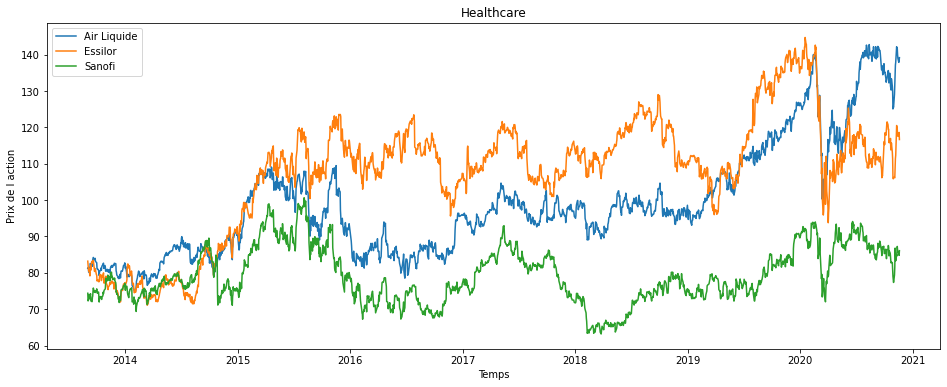

In [62]:
#Courbe des sociétés du secteur Healthcare

#import 
import pandas as pd
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt

#init des variables temporelles
start = '09-01-2013'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujourd hui
                              datetime.now().month , 
                              datetime.now().day))

#listes des sociétés et des tickets
cac40_ticket = [ 'AI.PA','EL.PA','SAN.PA']
cac40 = ['Air Liquide','Essilor','Sanofi']
d = {}

plt.figure ( figsize = (16,6)  )   #taille de la figure

#get data from yahoo avec les tickets
for societe , ticket in zip(cac40 , cac40_ticket) :
    try:
        d [societe] = dr.data.get_data_yahoo (ticket, start = start, end = end)
    except:
        continue   
        
    plt.plot( d [societe].index, d [societe]['Close'], label = societe)   #plot

#plot
plt.title ('Healthcare')   
plt.xlabel ('Temps')    
plt.ylabel ('Prix de l action')
plt.legend()
plt.show();

##### Observations du secteur Healthcare

Les entreprises qui sont liées avec le monde medical ont des tendances haussières depuis 2014. Elles subissent également la crise du covid 19 mais le prix de leurs actions rebondit.

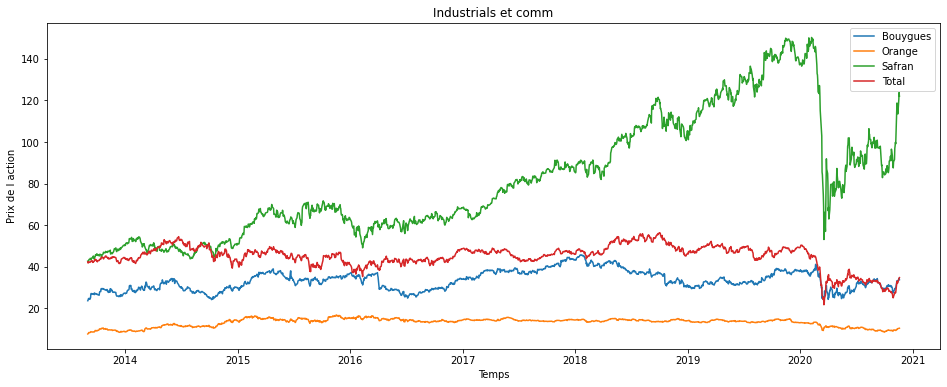

In [63]:
#Courbe des sociétés du secteur Industrials et comm

#import 
import pandas as pd
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt

#init des variables temporelles
start = '09-01-2013'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujourd hui
                              datetime.now().month , 
                              datetime.now().day))

#listes des sociétés et des tickets
cac40_ticket = [ 'EN.PA','ORA.PA','SAF.PA','FP.PA']
cac40 = ['Bouygues','Orange','Safran','Total']
d = {}

plt.figure ( figsize = (16,6)  )   #taille de la figure

#get data from yahoo avec les tickets
for societe , ticket in zip(cac40 , cac40_ticket) :
    try:
        d [societe] = dr.data.get_data_yahoo (ticket, start = start, end = end)
    except:
        continue   
        
    plt.plot( d [societe].index, d [societe]['Close'], label = societe)   #plot

#plot
plt.title ('Industrials et comm')   
plt.xlabel ('Temps')    
plt.ylabel ('Prix de l action')
plt.legend()
plt.show();

##### Observations du secteur Industriel

Les entreprises Safran et total ont eu une baisse significative de leurs actions au covid 19. Les sociétés de communication ont des prix d'actions stables.

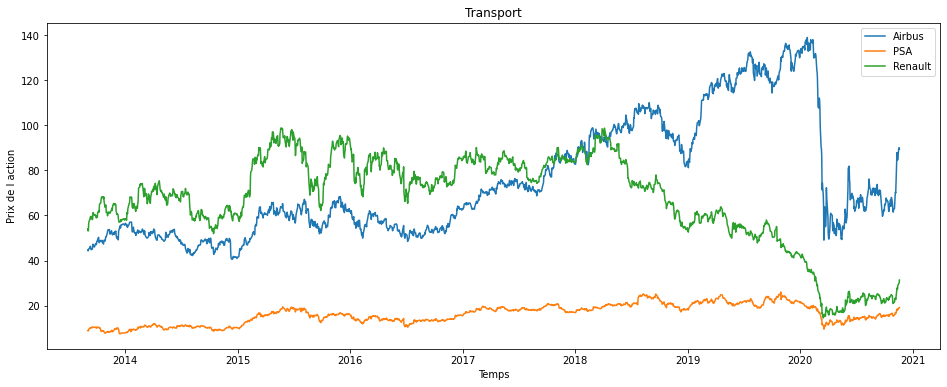

In [64]:
#Courbe des sociétés du secteur Transport

#import 
import pandas as pd
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt

#init des variables temporelles
start = '09-01-2013'    #date de debut
end = str ("{}-{}-{}".format (datetime.now().year,     #date de fin = aujourd hui
                              datetime.now().month , 
                              datetime.now().day))

#listes des sociétés et des tickets
cac40_ticket = [ 'AIR.PA','UG.PA','RNO.PA']
cac40 = ['Airbus','PSA','Renault']
d = {}

plt.figure ( figsize = (16,6)  )   #taille de la figure

#get data from yahoo avec les tickets
for societe , ticket in zip(cac40 , cac40_ticket) :
    try:
        d [societe] = dr.data.get_data_yahoo (ticket, start = start, end = end)
    except:
        continue   
        
    plt.plot( d [societe].index, d [societe]['Close'], label = societe)   #plot

#plot
plt.title ('Transport')   
plt.xlabel ('Temps')    
plt.ylabel ('Prix de l action')
plt.legend()
plt.show();

##### Observations du secteur Transport

Le secteur automobile semblait déjà être un peu en difficultés avant la crise et l'est devenu encore pendant.  Par le contre le secteur aéronautique avec airbus comm exemple avait une tendance à la hausse jusqu'à la crise du covid 19 où le prix de ses actions chute, et remonte timidement par la suite. 

## Prédiction avec Sarimax

Le but de cette étape est de predire le cours d'une société afin de determiner son prix à la fermeture future. 

Nous allons tout d'abord importer 2 jeux de données, le premier jeux de données  servira à entrainer notre modèle. Nous effecturons des predictions sur l'ensemble test et etablirons l'erreur de notre prediction.  

L'algorithme étudié est le Sarimax. Cette etude permettra de savoir si l'algorithme est pertinent pour prédire le cours des actions. 

Nous effecturons notre prediction sur la société air liquide du cac40.

In [67]:
#import 
import pandas as pd
import pandas_datareader as dr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from universal import algos
import statsmodels.api as sm


# Recuperer les data pour les 2 jeux 

#Periode de train
train_start = datetime(2001,9,1)
train_end = datetime(2017,1,1)

#Periode de test
test_start = datetime (2017,1,25)
test_end = str( '{}-{}-{}'.format(datetime.now().year, datetime.now()
                             .month,datetime.now().day) )

#Importation de 2 jeux de données train et test 
train = dr.data.get_data_yahoo (['AIR.PA'] , 
                             start = train_start, 
                             end = train_end,
                             interval='mo')['Close']

test = dr.data.get_data_yahoo (['AIR.PA'] , 
                             start = test_start, 
                             end = test_end,
                              interval='mo')['Close']

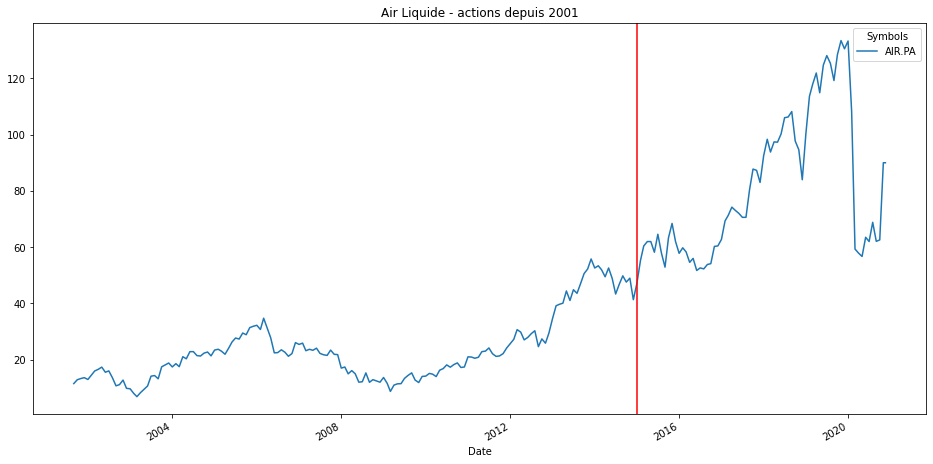

In [70]:
#Tout d abord, nous allons visualiser l action d Air Liquide 

#plot 
pd.concat([train, test]).plot (figsize = (16,8), title = 'Air Liquide - actions depuis 2001')
plt.axvline(x='2015-01-01', color='red');  #separation temporel des 2 datasets

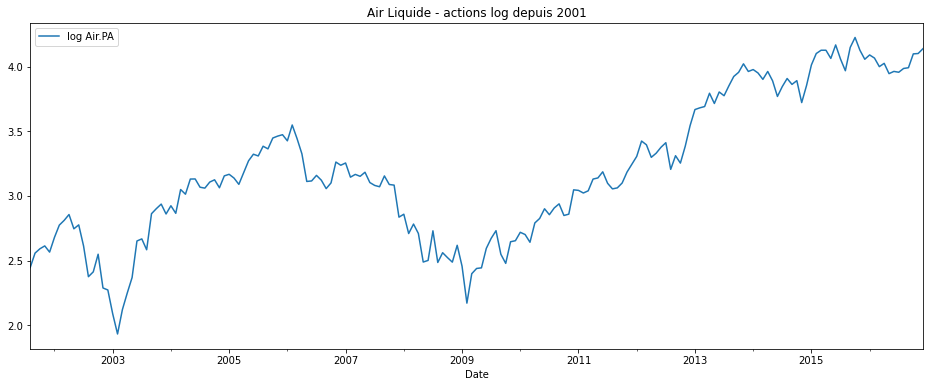

In [73]:
# Visuellement, la tendance de la courbe est haussiere. 
# nous allons appliquer la fonction logarithmique sur la courbe 
# afin de la lisser puis la visualiser 

#import 
import statsmodels.api as sm
from datetime import datetime

train_log  = np.log( train['AIR.PA'])  #fonction log
train_log.plot (figsize = (16,6),   #plot 
                title = 'Air Liquide - actions log depuis 2001', 
                label = 'log Air.PA')

plt.legend()
plt.show();

Visuellement, la tendance de la time serie lissée est toujours haussière. 
nous allons décomposer la courbe pour avoir ses 3 composantes : 

    ● la tendance de la courbe
    ● la saisonalite de la courbe
    ● le bruit 


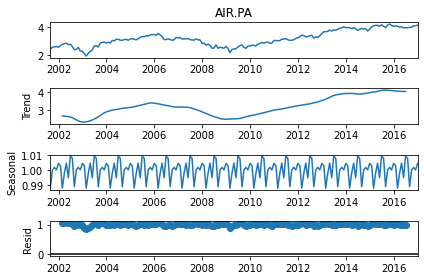

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose   #decomposition ETS

result = seasonal_decompose ( train_log, model = 'multiplicative' , period = 12  )
fig = result.plot()


Pour tracer les graphes d'autocorrelation et d'autocorrelation partiel, il faut que la time serie est une tendance stable.

Nous allons donc vérifier que la tendance soit stable.


Le test de Augmented Dickey-Fuller sur une time serie permet de s'assurer que la tendance est stable.  

Nous allons créer une fonction dediée à l'application du test ADF.

In [75]:
#fonction pour l application du test ADF Augmented Dickey-Fuller test sur une time serie

from statsmodels.tsa.stattools import adfuller

# Mémoriser dans une fonction pour une utilisation ultérieure !
def adf_check(time_series):
    """
    Passe une série temporelle, retourne le rapport ADF
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller test (DAF):')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires")
    else:
        print("Faible preuve contre l'hypothèse nulle, la série temporelle a une racine unitaire, ce qui indique qu'elle est non stationnaire ")
    #return result[1]

In [78]:
adf_check (train_log)   #verification avec DAF test

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -1.0102601144846441
p-value : 0.7495037896844383
#Lags Used : 0
Number of Observations Used : 184
Faible preuve contre l'hypothèse nulle, la série temporelle a une racine unitaire, ce qui indique qu'elle est non stationnaire 


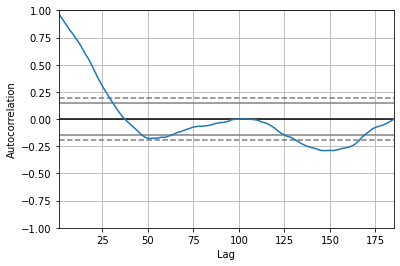

In [77]:
#le resultat du ADF test nous indique que la courbe est non stationnaire.

# Il y a aussi une methode visuelle pour confirmer si la time serie est stable
pd.plotting.autocorrelation_plot(train_log);
#cela confirme visuellement le Augmented Dickey-Fuller test (DAF) 

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -14.170731571032487
p-value : 2.0054262761109715e-26
#Lags Used : 0
Number of Observations Used : 183
Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires


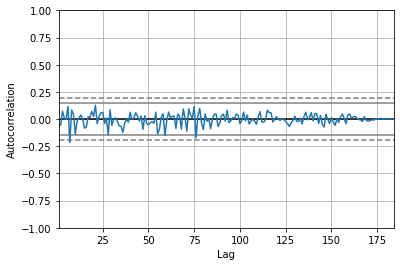

In [80]:
#nous allons stabiliser la courbe

train_1 = train_log.diff().dropna()  #stabilisation
adf_check (train_1)   #verification avec DAF test

pd.plotting.autocorrelation_plot(train_1);  #verification visuelle
#cela confirme visuellement le Augmented Dickey-Fuller test (DAF) 

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -6.992238380184499
p-value : 7.691918967551767e-10
#Lags Used : 11
Number of Observations Used : 160
Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires


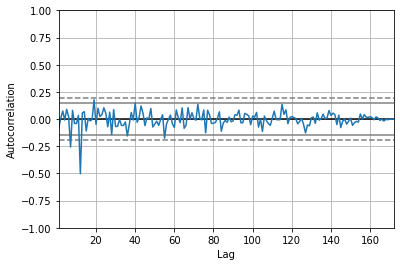

In [110]:
#Nous allons linearisé la saisonalité 

train_saison_1 = train_1.diff(periods = 12).dropna() #stabilisation de la saisonalité

adf_check (train_saison_1)   #ADF test
pd.plotting.autocorrelation_plot(train_saison_1) ;  #Verificatoin visuelle

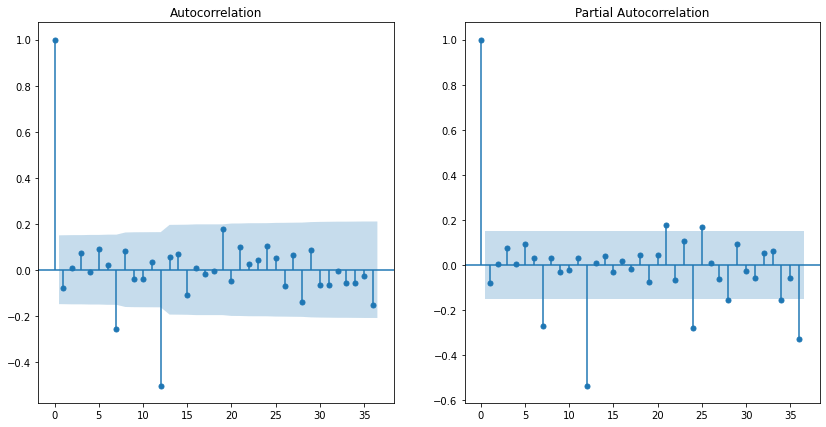

In [82]:
# Les times series sont stationnaires, nous pouvons tracer les courbes 
# d autocorrelation et d autocorrelation partielle

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize= (14,7))

plt.subplot(121)
plot_acf(train_saison_1, lags = 36, ax=plt.gca())   

plt.subplot(122)
plot_pacf(train_saison_1, lags = 36, ax=plt.gca())  

plt.show()

In [86]:
#Fonction d’Auto-Corrélation (ACF) = PA = #p s annule au rang 1  
#Fonction d’Auto-Corrélation Partielle (PACF) = MA = #q s annule au rang 1

model=sm.tsa.SARIMAX(train_log,order=(1,1,0),seasonal_order=(1,1,0,12))   
results=model.fit()       #fit
print(results.summary())  #resume sur le modele entrainé

   # bruits blanc
   #test de Ljung-Box val = 0.94 
   #test de Jarque-Bera val = 0.82 

C:\Users\bilel\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\bilel\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                             AIR.PA   No. Observations:                  185
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 119.373
Date:                            Wed, 18 Nov 2020   AIC                           -232.745
Time:                                    21:54:16   BIC                           -223.303
Sample:                                08-31-2001   HQIC                          -228.914
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0977      0.076     -1.282      0.200      -0.247       0.052
ar.S.L12      -0.5611      0.067   

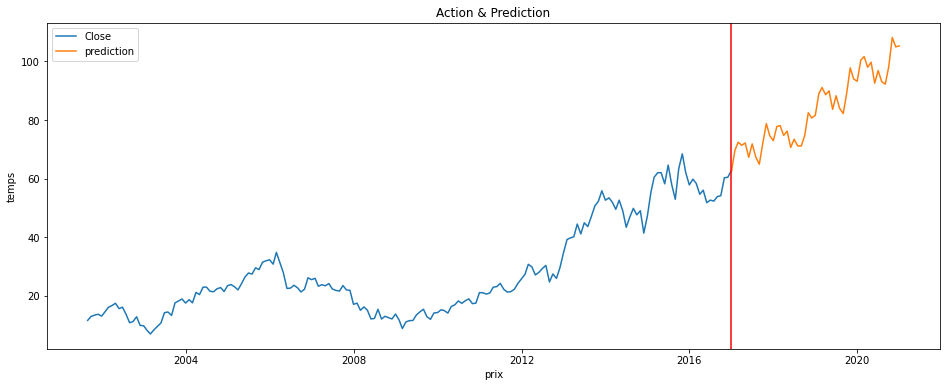

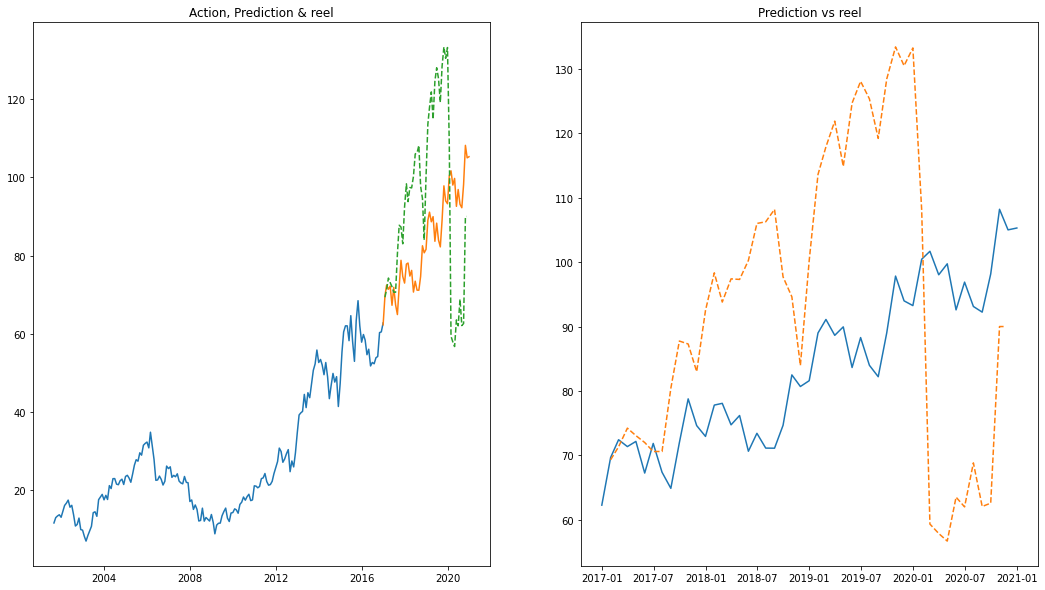

In [108]:
df = pd.concat([train, pred])   #
#df.plot()    #plot

#prediction (a partir du dernier terme jusqu a 2020)
pred = np.exp(results.predict(len (train) - 1, 232 ))

#plot
plt.figure ( figsize =  (16,6) )
plt.plot (train, label = 'Close')
plt.plot (pred, label = 'prediction')

plt.axvline(x='2017-01-01', color='red')  

plt.legend ()
plt.title ('Action & Prediction')
plt.xlabel ('prix')
plt.ylabel ('temps')
plt.show();

plt.figure(figsize= (18,10))   

plt.subplot(121)   
plt.title ('Action, Prediction & reel')
plt.ylabel ('prix')
plt.xlabel ('temps')
#plt.plot(pd.concat([train, pred])); 
plt.plot (train, label = 'Close')
plt.plot (pred, label = 'prediction')
plt.plot(test, '--')   


plt.subplot(122)   
plt.title ('Prediction vs reel')
plt.ylabel ('prix')
plt.xlabel ('temps')
plt.plot(pred);  
plt.plot(test, '--')     

plt.show();

La prediction n'est visuellement pas correcte.

La saisonalité semble correcte mais la tendance de la prédiciton semble inférieure.

La forte descente est dû à la crise covid 19 et notre modèle actuel n'aurait jamais pu le prevoir.

Nous allons calculer un indice de l'erreur : le MAPE (Mean Absolute Prediction Error)

In [109]:
y_true, y_pred = np.array(test), np.array(pred)

MAPE = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Mean Absolute Prediction Error : %0.2f%%"% MAPE)



Mean Absolute Prediction Error : 24.02%


#### Conclusion de la prédiction

Le MAPE est important. Graphiquement nous pouvons le constater visuellement également. 

Nous nous apercevons que notre modèle de prediction ne semble pas adapté à ce type d'application.


-------------

## Prédiction avec le Deep Learning (RNN)

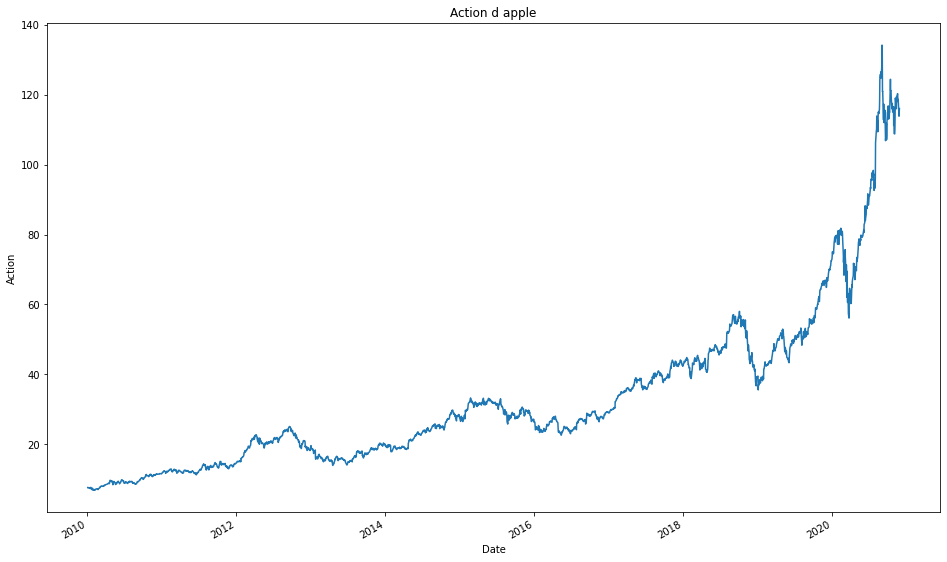

In [6]:
#import
%matplotlib inline
import numpy as np
import pandas_datareader as dr
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.utils import np_utils 
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
from datetime import datetime 



#import des actions 

#init
deb = '2010-01-01'
fin = str( '{}-{}-{}'.format(datetime.now().year, datetime.now().month,datetime.now().day) )
ticket = 'AAPL'  #societe = Apple

#recuperation des data de la variable close 
df = dr.data.get_data_yahoo (ticket, start = deb, end = fin )['Close']   

#plot de l'action d apple 
df.plot(title = 'Action d apple', figsize = (16,10))
plt.ylabel ("Action");

In [7]:
#1 Etape de normalisation des données du dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform (df.values.reshape( -1, 1))



In [8]:
#2 separation en 2 ensemble (train et test)

data_train = df_scaled [:int (len (df) * 0.8) ]    #ensemble train 80% du df
data_test = df_scaled [int (len (df) * 0.8) :]    #ensemble test 

print ('le jeu d entrainement comporte',data_train.shape)  #shape du jeu     
print ('le jeu de test comporte',data_test.shape)  #shape du jeu

le jeu d entrainement comporte (2196, 1)
le jeu de test comporte (549, 1)


In [9]:
#3 Separation de l ensemble de train en feature et target

n = 5 #n = jours #on va recolter n Close pour predire la valeur n+1

x_train = []   #feature
y_train = []   #target

# on cree un array de feature de lignes * col (=n) 
# et un autre arrray qui correspond a la taget 

for i in range (n , len(data_train)):

    #if i < len(data_train) - n : 
    x_train.append ( data_train [ i-n : i , 0 ])   #feature
    y_train.append ( data_train [ i , 0])          #target 


# numpy (listes)
x_train = np.array (x_train)
y_train = np.array (y_train)  

print ('La 1ere valeur de la feature correspond :\n',x_train[0])

print ('\nLa 1ere valeur de la target correspond :\n',y_train[0])

La 1ere valeur de la feature correspond :
 [0.0061599  0.00626369 0.00530717 0.00519777 0.00559048]

La 1ere valeur de la target correspond :
 0.005065933009717957


In [10]:
#4 reshape des datas
x_train = x_train.reshape ( ( x_train.shape[0] , x_train.shape[1] , 1 )  )

#format des array
print ('Le format des datas sont',x_train.shape)
print ('Le format des datas sont',y_train.shape)

Le format des datas sont (2191, 5, 1)
Le format des datas sont (2191,)


In [11]:
#5 nous allons creer un modele et y ajouter des couches 

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,activation = 'relu',input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True,activation = 'relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True,activation = 'relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 5, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [12]:
#6 Compilation

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse','mape'])

In [13]:
#7 fit du modele

epoch= 10
training_history = model.fit(x_train,y_train,epochs=epoch,batch_size=10,validation_split = 0.2)

Epoch 1/10
176/176 [==============================] - 5s 28ms/step - loss: 0.0021 - mse: 0.0021 - mape: 7734.3755 - val_loss: 0.0012 - val_mse: 0.0012 - val_mape: 12.0658
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 2.6194e-04 - mse: 2.6194e-04 - mape: 15565.7256 - val_loss: 6.0190e-04 - val_mse: 6.0190e-04 - val_mape: 7.6885
Epoch 3/10
176/176 [==============================] - 3s 16ms/step - loss: 2.6197e-04 - mse: 2.6197e-04 - mape: 18126.9141 - val_loss: 4.0730e-04 - val_mse: 4.0730e-04 - val_mape: 6.1871
Epoch 4/10
176/176 [==============================] - 3s 16ms/step - loss: 2.1734e-04 - mse: 2.1734e-04 - mape: 13540.1689 - val_loss: 0.0010 - val_mse: 0.0010 - val_mape: 10.2164
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 1.8905e-04 - mse: 1.8905e-04 - mape: 12288.5322 - val_loss: 3.5070e-04 - val_mse: 3.5070e-04 - val_mape: 5.4767
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 1.8411e-04 - 

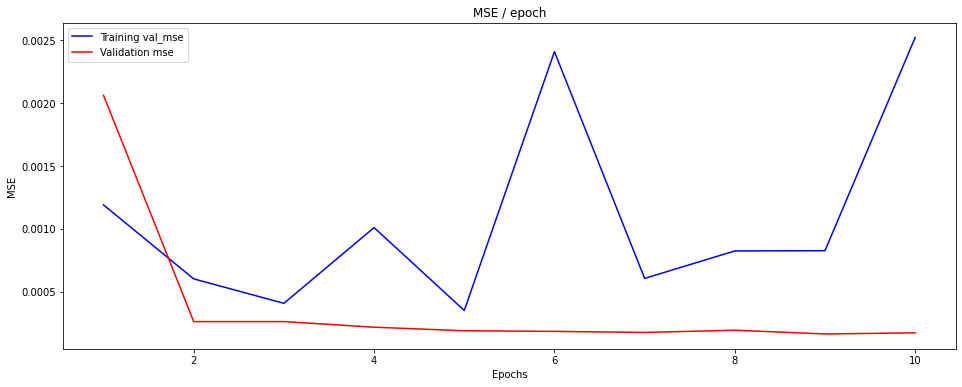

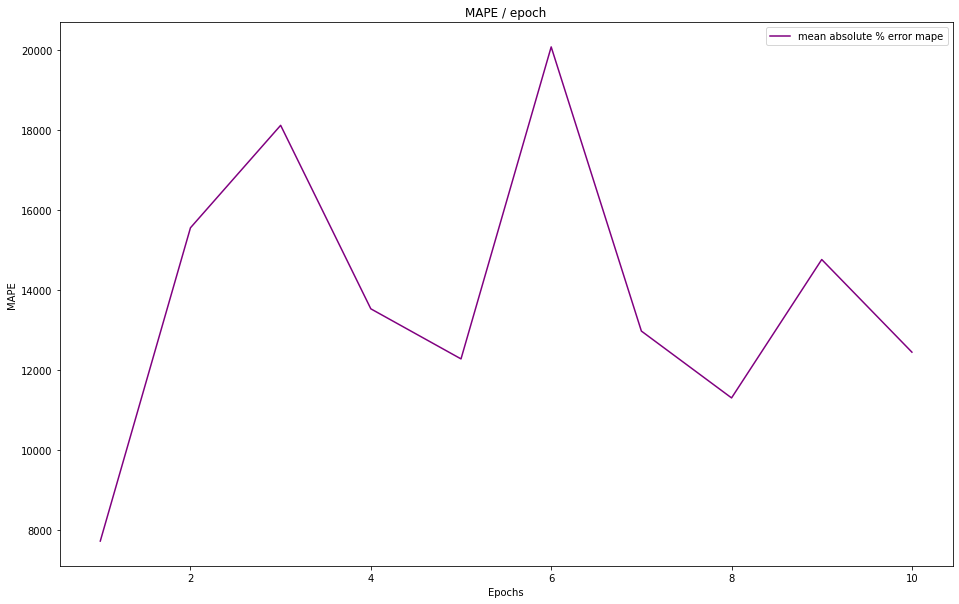

In [14]:
#8 Analyse 

train_acc = training_history.history['val_mse']
val_acc = training_history.history['mse']
                
fig_acc = plt.figure(figsize=(16,6))     #figure            

# Courbe du mse sur l'échantillon 
plt.plot(np.arange(1 ,epoch+1 , 1),   #plot val mse
         training_history.history['val_mse'],
         label = 'Training val_mse',
         color = 'blue')    

# Courbe de la précision de validation mse sur l'échantillon
plt.plot(np.arange(1 , epoch+1, 1),  #plot val mse
         training_history.history['mse'], 
         label = 'Validation mse',
         color = 'red')  

#legend
plt.xlabel('Epochs')
plt.ylabel('MSE')    
plt.title ('MSE / epoch')
plt.legend()            
plt.show()  

plt.figure (figsize=(16,10))     

#plot MAPE
plt.plot(np.arange(1 , epoch+1, 1),          
         training_history.history['mape'], 
         label = 'mean absolute % error mape',
         color = 'purple')               

#legend
plt.xlabel('Epochs')    
plt.ylabel('MAPE')    
plt.title ('MAPE / epoch')
plt.legend()            
plt.show() 

In [15]:
# predictions des valeurs du jeu de test 

# on cree un array de valeur a predire de lignes * col (=n) 
# et un autre arrray qui correspond au valeurs reelles 

x_test = []   
y_test = []   

for i in range (n , len(data_test)):
    
    x_test.append ( data_test [i-n:i , 0 ]) 
    y_test.append (data_test [i , 0])

# numpy
x_test = np.array (x_test)
y_test = np.array (y_test)

#reshape des val a predire 
x_test = x_test.reshape (x_test.shape[0] , x_test.shape[1] , 1 )
y_test = y_test.reshape (len (y_test),1)

#predicition
prediction = model.predict (x_test)

# valeur non normaliser 
#prediction = scaler.inverse_transform (prediction)
#y_test = scaler.inverse_transform (y_test)
#
#reshape 
prediction = prediction.reshape (len (prediction),)
y_test = y_test.reshape (len (y_test),)

#creation des df 
#df_pred_test = pd.DataFrame (prediction , index = df[int (len (df) * 0.8) + n :].index)
#df_y_test = pd.DataFrame (y_test , index = df[int (len (df) * 0.8) + n  :].index)
df_pred_test = pd.DataFrame (prediction , index = df[int (len (df) * 0.8)+n  :].index)
df_y_test = pd.DataFrame (y_test , index = df[int (len (df) * 0.8)+n   :].index)

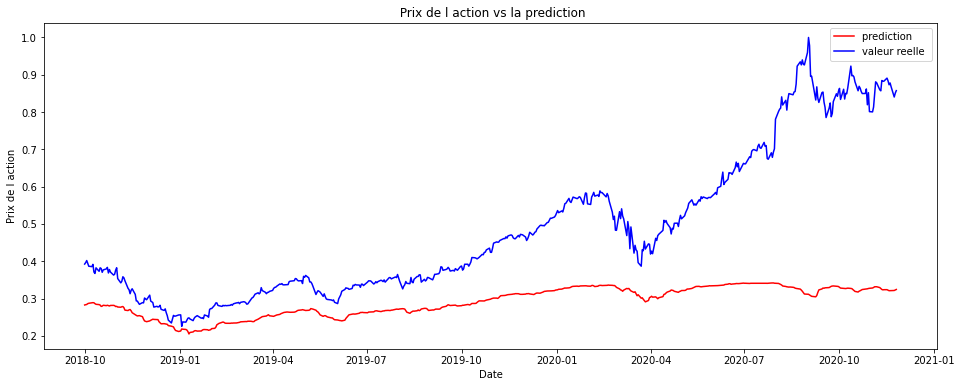

In [17]:
### Nous affichons nos valeurs reelles et notre prediction afin de les analyser 
plt.figure (figsize=(16,6))   #figure

#Courbe de prediction
plt.plot(df_pred_test,
         label = 'prediction ',
         color = 'red' )

#Courbe de valeurs reelles
plt.plot(df_y_test,
         label = 'valeur reelle ',
         color = 'blue' )

#legende
plt.title (' Prix de l action vs la prediction')
plt.ylabel('Prix de l action')
plt.xlabel('Date')
plt.legend()            
plt.show()  

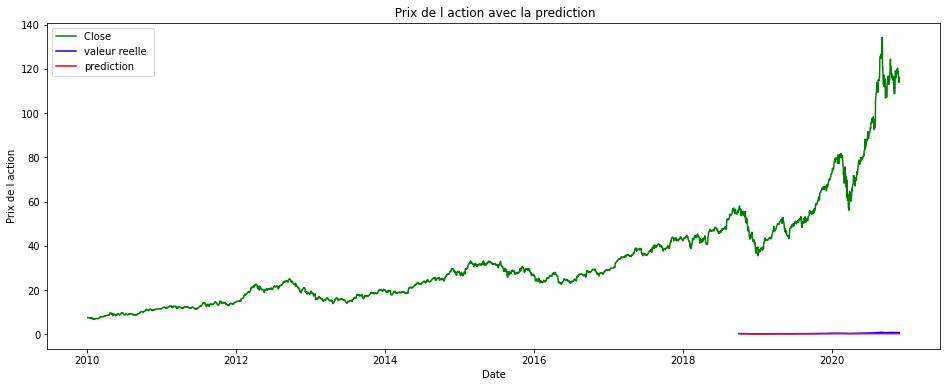

In [18]:
plt.figure (figsize=(16,6))   #figure

#courbe du df
plt.plot(df,
         label = 'Close ',
         color = 'Green' )
#Courbe de valeurs reelles
plt.plot(df_y_test,
         label = 'valeur reelle ',
         color = 'blue' )
#Courbe de prediction
plt.plot(df_pred_test,
         label = 'prediction',
         color = 'red' )

#legendes
plt.title (' Prix de l action avec la prediction')
plt.ylabel('Prix de l action')
plt.xlabel('Date')
plt.legend()            
plt.show()  

In [19]:
#Nous allons calculer un indice d erreur : le RMSE (root mean square error)
rmse = np.sqrt ( np.mean ( prediction - y_test )**2 )
print ( rmse )

0.19280704877261545


#### Conclusions de la prédiction

La rmse est important. Notre courbe garde une forme de notre courbe mais reste toujours inférieure à la valeur réelle. 
Notre prédiction nous permet de prédire à n+1 donc n'est pas très eloignée dans le temps mais l'erreur est importante.

Ce modèle n'est toujours pas très adapté à cette application.

----

## Prédiction avec OLMAR

Cet algorithme est défini dans l'article "On-Line Portfolio Selection with Moving Average Reversion" de Bin & al, de la bibliographie.

L'algorithme est deja implementé dans un package. 
Pour implementer cet algorithme, il faut installer le package correspondant à l'aide de l'instruction suivante:

    pip install universal-portfolios




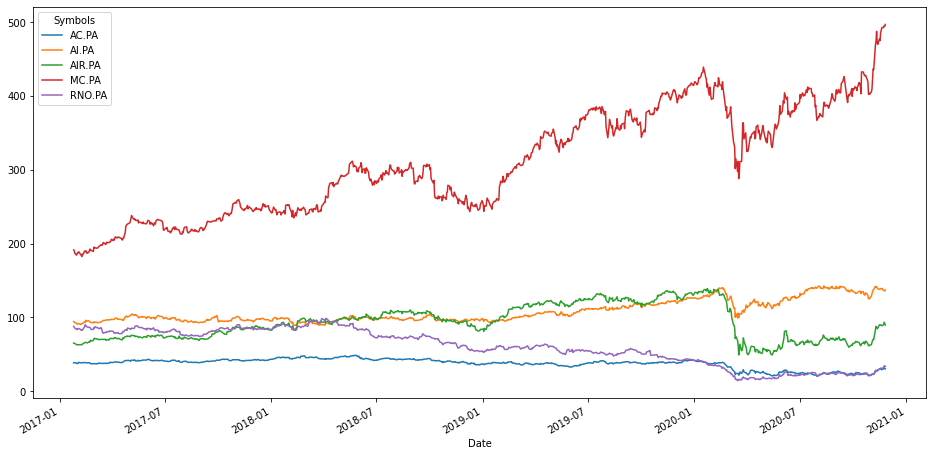

In [1]:
#import
from pandas_datareader.data import DataReader
import universal as up
from universal import tools, algos
from universal.algos import *
import matplotlib.pyplot as plt

 #init la taille des figure 
plt.rcParams["figure.figsize"] = (16, 8)   

#selection ticket
ticket = ['AC.PA','AI.PA','AIR.PA', 'MC.PA', 'RNO.PA' ]  #ticket CAC40

# import des data
df = DataReader(ticket, 'yahoo', start=datetime.datetime(2017,1,25))['Close']

#affiche les datas
df.plot ();

Summary for window=3:
    Profit factor: 1.01
    Sharpe ratio: 0.26 ± 0.52
    Ulcer index: 0.48
    Information ratio (wrt UCRP): 0.06
    Appraisal ratio (wrt UCRP): 0.01 ± 0.51
    UCRP sharpe: 0.31 ± 0.52
    Beta / Alpha: 1.13 / 0.264%
    Annualized return: 2.48%
    Annualized volatility: 38.56%
    Longest drawdown: 264 days
    Max drawdown: 62.37%
    Winning days: 51.8%
    Annual turnover: 322.6
        
Summary for window=5:
    Profit factor: 1.09
    Sharpe ratio: 0.61 ± 0.56
    Ulcer index: 1.42
    Information ratio (wrt UCRP): 0.64
    Appraisal ratio (wrt UCRP): 0.56 ± 0.51
    UCRP sharpe: 0.31 ± 0.52
    Beta / Alpha: 1.17 / 14.218%
    Annualized return: 17.65%
    Annualized volatility: 39.74%
    Longest drawdown: 264 days
    Max drawdown: 63.52%
    Winning days: 51.1%
    Annual turnover: 248.0
        
Summary for window=10:
    Profit factor: 1.16
    Sharpe ratio: 0.90 ± 0.61
    Ulcer index: 2.76
    Information ratio (wrt UCRP): 1.09
    Appraisal rati

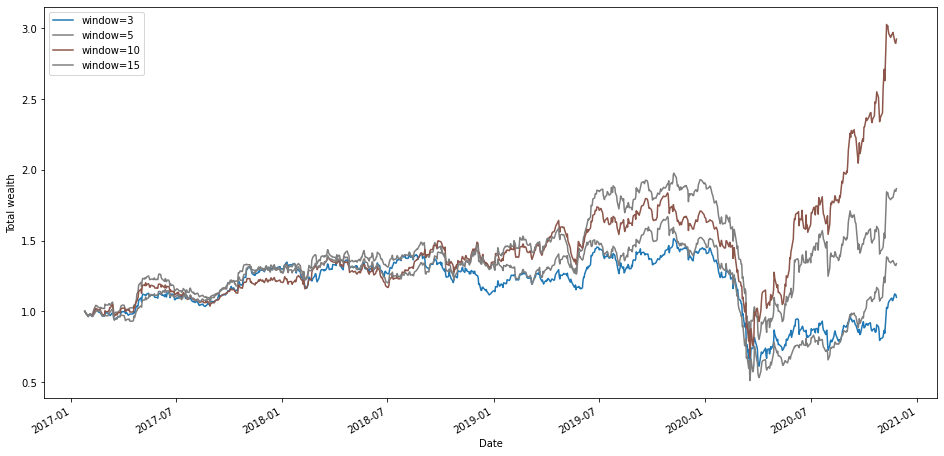

In [2]:
#Nous implementons l algorithme OLMAR a l aide des packages   
#Nous parametrons plusieurs fenetres afin d analyser les resultats.
#A cette etape nous n appliquons pas de frais supplementaires
#Nous n appliquons pas l'UCRP (uniform constant rebalanced portfolio)

list_result = algos.OLMAR.run_combination(df, window=[3,5,10,15], eps=10)   #algorythme
print(list_result.summary())  #generation du rappport
list_result.plot();   #plot 

Summary for window=10:
    Profit factor: 1.16
    Sharpe ratio: 0.90 ± 0.61
    Ulcer index: 2.76
    Information ratio (wrt UCRP): 1.09
    Appraisal ratio (wrt UCRP): 0.99 ± 0.51
    UCRP sharpe: 0.31 ± 0.52
    Beta / Alpha: 1.15 / 26.121%
    Annualized return: 32.24%
    Annualized volatility: 39.89%
    Longest drawdown: 205 days
    Max drawdown: 63.22%
    Winning days: 50.9%
    Annual turnover: 172.8
        


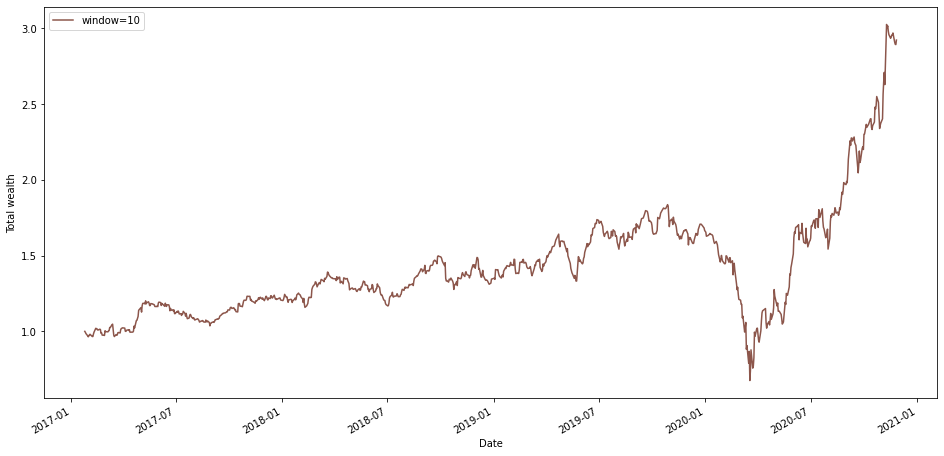

In [3]:
#Nous recherchons la fenetre la plus interessante du point de vue profit
#dans le cas actuel c est la fenetre 10.


result = algos.OLMAR.run_combination(df, window=[10], eps=10)   #nous allons implementer les parametres 
print(result.summary())
result.plot();

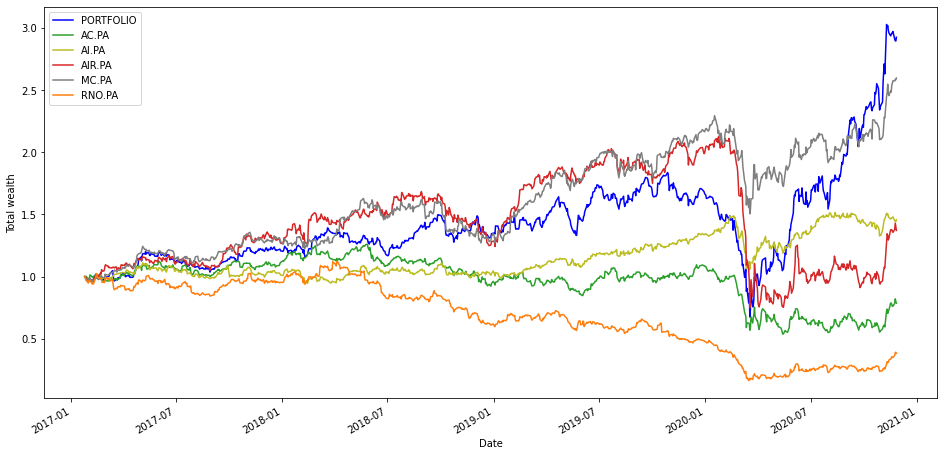

In [4]:
#plot de notre portfeuille et des assets
algos.BAH().run(result).plot(assets=True, weights=False, ucrp=False,logy=False);

La sélection des assets peut etre faite en fonction de la valeur qu'elle apporte à notre portefeuille. 
par exemmple Renault (RNO) (en orange) n'ajoute pas de valeur, et le choix de le conserver est discutable. 
Nous n'utilisons pas de strategie d'acheteur pour notre demonstration.
Nous avons differsifié notre portefeuille avec des sociétés de secteurs divers.

Pour l'analyse de notre portefeuille : 
    Nous avons un retour sur investissement multiplié par 3 (somme initiale de notre portefeuille * 3 )
    Si nous avons  investit 1000 euros, nous aurions deja 3000 euro en 3ans.

C est un excellent resultat!!!

Notre modèle est simpliste car il ne comprend pas les frais appliqués aux transactions.


Summary for window=10:
    Profit factor: 1.06
    Sharpe ratio: 0.47 ± 0.54
    Ulcer index: 1.19
    Information ratio (wrt UCRP): 0.41
    Appraisal ratio (wrt UCRP): 0.34 ± 0.51
    UCRP sharpe: 0.31 ± 0.52
    Beta / Alpha: 1.15 / 8.866%
    Annualized return: 11.47%
    Annualized volatility: 39.52%
    Longest drawdown: 534 days
    Max drawdown: 65.33%
    Winning days: 49.7%
    Annual turnover: 172.8
        


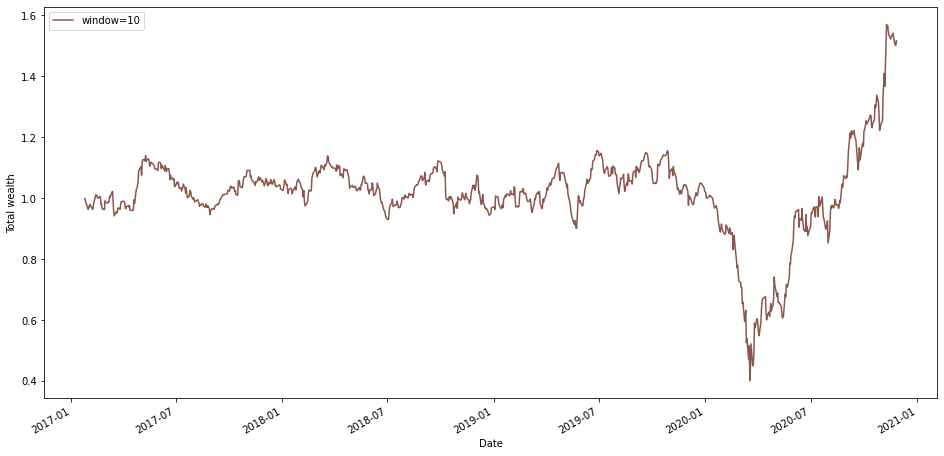

In [5]:
result.fee = 0.001   #application des frais
print(result.summary())
result.plot(assets=False, ucrp=False, logy=False);


En appliquant des frais, c est beaucoup moins intéressant on degage une marge de 1.6 avec des frais, alors que sans frais c'etait 3.0.
Cet algorithme est efficace pour la sélection de portefeuille. 


#### Conclusion algorithme OLMAR

Nous avons dans cette partie utilisé l'algorithme OLMAR pour l'allocation dynamique de portefeuille. 

L'algorithme OLMAR est implementé pour ce type d application et permet de creer et analyser un porte feuille.

--------

#### Conclusion finale : 
 
Le monde de la finance est très interessant et se prête à l'application des data sciences car il est très riches en données.

Afin de réaliser ce projet, les données ont été importées à l'aide d'un API (Yahoo). Nous les avons traités, étudiés puis visionnés afin d'implementer des algorithmes et determiner la valeur de l'action. 

L'utilisation de l'algorithme SARIMAX sur nos données nous a permis de constater que ce dernier n'est pas adapté pour ce genre d'application. 

Nous avons ensuite implementé une methode de deep learning. Cette methode montre de bons resultats sur une prédiction à court terme, mais n'est pas optimale sur une prediction éloignée temporellement.

L'algorithme OLMAR a finalement été implementé pour la selection de portefeuille online. Nous avons pu dégager un profit et identifier les actifs interessants.

Ce projet nous a permis de mettre en application les connaissances acquises lors de notre formation. C'est une approche originale, intéressante de l'utilisation des data sciences puisqu'on a pu apprehender une des nombreuses utilisations possibles des algorithmes et du machine learning.
 
C'est une utilisation avec une forte valeur ajoutée afin de se constituer un portefeuille sur ce secteur.

